In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random,math

In [2]:
directory = os.listdir(os.getcwd() + '/001/L/')
num_of_file = len(directory)
for file in directory:
    print(file)


1.jpg
5.2.jpg
6.2.jpg
5.1.jpg
3.jpg
.ipynb_checkpoints
6.1.jpg
2.jpg
4.jpg


In [36]:
file_name = input("Filename with extension: ")
path = os.getcwd() + '/001/L/%s' % (file_name)
# path = './001/L/1.jpg'


image_read = cv2.imread(path)
image_read = cv2.resize(image_read,(300,300))
# print(image_read)
output = image_read


image_test = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_test = cv2.resize(image_test,(300,300))
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)
image_test = cv2.Canny(image_test, 20, 70, apertureSize=3)
# cv2.imshow("canny outer", image_test)

# hough_circle = cv2.HoughCircles(image_test, cv2.HOUGH_GRADIENT, 1.3, 800)
# if hough_circle is not None:
#     hough_circle = np.round(hough_circle[0, :]).astype("int")
#     for (x, y, radius) in hough_circle:
#         cv2.circle(output, (x, y), radius, (255, 0, 0), 4)
# print('Reached Image Test 1')

image_test1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_test1 = cv2.resize(image_test,(300,300))
image_test1 = cv2.GaussianBlur(image_test1, (7, 7), 1)
image_test1 = cv2.Canny(image_test1, 100, 120, apertureSize=3)
# cv2.imshow("canny-2", image_test1)

circles = cv2.HoughCircles(image_test,cv2.HOUGH_GRADIENT,1,800,
                            param1=50,param2=20,minRadius=0,maxRadius=60)
circles = np.round(circles[0, :]).astype("int")

for (x, y, r) in circles:
    cv2.circle(output, (x, y), r, (0, 255, 0), 2)
    cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)

plt.imshow(output)
# cv2.waitKey(200)


Filename with extension: Arnav.jpg


[ WARN:0@1658.925] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/user/Desktop/CODE/Python/IRIS_RECOG/Iris-Segmentation/001/L/Arnav.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [38]:

file_name = input('Enter File Name with Extension: ') #original image
path = os.getcwd() + '/001/L/%s' % (file_name)
image_read = cv2.imread(path)
image_read = cv2.resize(image_read,(300,300))


output = image_read.copy()


image_test2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image_test2 = cv2.resize(image_test2,(300,300))

image_test2 = cv2.GaussianBlur(image_test2, (7, 7), 1)
image_test2 = cv2.Canny(image_test2, 20, 70, apertureSize=3)


Enter File Name with Extension: Data/Arnav.jpg


[ WARN:0@1697.877] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/user/Desktop/CODE/Python/IRIS_RECOG/Iris-Segmentation/001/L/Data/Arnav.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


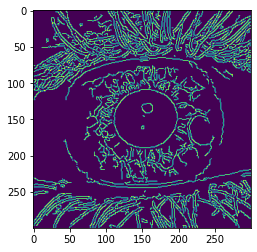

In [7]:
plt.imshow(image_test)


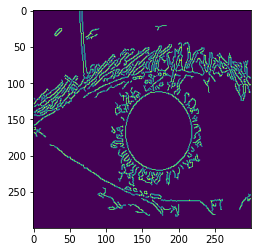

In [8]:
plt.imshow(image_test2)

[ WARN:0@27.882] global /io/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Keypoints 1ST Image: 383
Keypoints 2ND Image: 758
GOOD Matches: 0
How good it's the match:  0.0
Access Denied


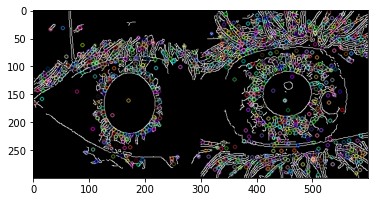

In [9]:

# hough_circle = cv2.HoughCircles(image_test, cv2.HOUGH_GRADIENT, 1.3, 800)
# if hough_circle is not None:
#     hough_circle = np.round(hough_circle[0, :]).astype("int")
#     for (x, y, radius) in hough_circle:
#         cv2.circle(output, (x, y), radius, (255, 0, 0), 4)

# image_test3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# image_test3 = cv2.resize(image_test,(300,300))

# image_test3 = cv2.GaussianBlur(image_test3, (7, 7), 1)
# image_test3 = cv2.Canny(image_test3, 100, 120, apertureSize=3)

# circles = cv2.HoughCircles(image_test,cv2.HOUGH_GRADIENT,1,800,
#                             param1=50,param2=20,minRadius=0,maxRadius=60)
# circles = np.round(circles[0, :]).astype("int")

# for (x, y, r) in circles:
#     cv2.circle(output, (x, y), r, (0, 255, 0), 2)
#     cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)

original = image_test2
image_to_compare = image_test

sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
for m, n in matches:
    if m.distance < 0.6*n.distance:
        good_points.append(m)

# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)

print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))
print("GOOD Matches:", len(good_points))
res = len(good_points) / number_keypoints * 100
print("How good it's the match: ", res)
threshold = 10
if res >= threshold:
    print("Access Granted")
else:
    print("Access Denied")

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)

plt.imshow(result)
# cv2.imwrite("feature_matching.jpg", result)



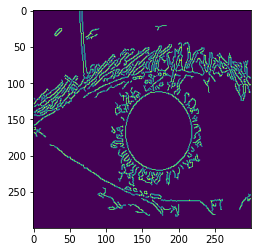

In [10]:
plt.imshow(original)

In [8]:
def gaus_canny(img_path):
    
    image_test2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image_test2 = cv2.resize(image_test2,(300,300))

    image_test2 = cv2.GaussianBlur(image_test2, (7, 7), 1)
    image_test2 = cv2.Canny(image_test2, 20, 70, apertureSize=3)
    return image_test2


In [30]:
sift = cv2.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)
# print('Matches',matches)
good_points = []
for m, n in matches:
    if m.distance < 0.6*n.distance:
        good_points.append(m)

# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)

print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))
print("GOOD Matches:", len(good_points))
res = len(good_points) / number_keypoints * 100
print("How good it's the match: ", res)
threshold = 90
if res >= threshold:
    print("Access Granted")
else:
    print("Access Denied")

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)


Keypoints 1ST Image: 521
Keypoints 2ND Image: 344
GOOD Matches: 0
How good it's the match:  0.0
Access Denied


In [45]:
img_list = sorted(os.listdir('./Data'))
person_to_be_checked = input('Enter the file for the person which is to be authenticated: ')
sift = cv2.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(gaus_canny(person_to_be_checked), None)



index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

good_points_list = []

for i in img_list:
    pathimg = './Data/'+i
    print(pathimg)
    img = gaus_canny(pathimg)
    kp_new, desc_new = sift.detectAndCompute(img, None)
    matches = flann.knnMatch(desc_1,desc_new,k=2)
    good_points= []
    for m, n in matches:
        if m.distance < 0.6*n.distance:
            good_points.append(m)
    good_points_list.append(good_points)
    


Enter the file for the person which is to be authenticated: ./test.jpg
./Data/2.jpg
./Data/3.jpg
./Data/4.jpg
./Data/5.2.jpg
./Data/6.2.jpg
./Data/Anu.jpg
./Data/Arnav.jpg
./Data/Arnav2.jpg
./Data/Arshi.jpg
./Data/H1.jpg


In [46]:
stored_only_points = []
for i in good_points_list:
    stored_only_points.append(len(i))
    print(len(i))
print(np.argmax(stored_only_points))    


0
1
0
0
0
0
0
0
0
0
1


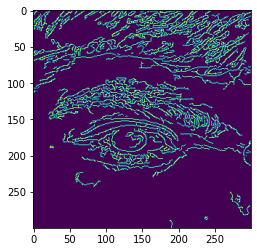

In [44]:
plt.imshow(gaus_canny('./Data/Arnav2.jpg'))

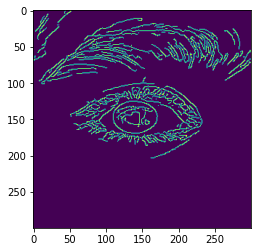

In [44]:
plt.imshow(gaus_canny('./Data/5.1.jpg'))

In [28]:
# def get_edges(img_path):
#         image_test2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         image_test2 = cv2.Canny(image_test2, 20, 70, apertureSize=3)
#         image_test2 = cv2.resize(image_test2,(300,300))
        
#         kernel = np.ones((3,3),np.uint8)
        
#         image_test2 = cv2.dilate(image_test2, kernel, iterations=1)
#         ksize = 2 * random.randrange(5,11) + 1
#         image_test2 = cv2.GaussianBlur(image_test2,(ksize,ksize),0)
#         return image_test2
    

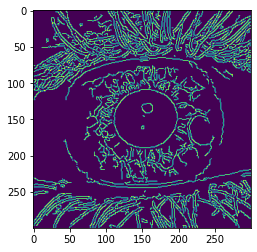

In [26]:
plt.imshow(gaus_canny('./Data/H1.jpg'))

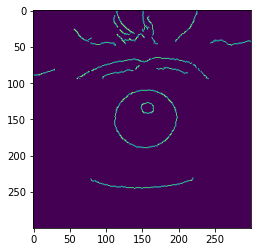

In [27]:
plt.imshow(get_edges('./Data/H1.jpg'))

In [4]:
eye_cascade = cv2.CascadeClassifier('harcascades/aarcascade_eye.xml')
# cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('harcascades/aarcascade_frontalface_default.xml')

def getleftmosteye(eyes):
    leftmost=9999999
    leftmostindex=-1
    for i in range(0,2):
        if eyes[i][0]<leftmost:
            leftmost=eyes[i][0]
            leftmostindex=i
    return eyes[leftmostindex]

In [11]:


img = cv2.imread('test3.jpg')
img = cv2.resize(img,(300,300))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes[0].tolist())
#     for (ex,ey,ew,eh) in eyes[0].tolist():
#          cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


#     ex,ey,ew,eh = eyes[0]
    ex,ey,ew,eh = getleftmosteye(eyes)

    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    crop_img = roi_color[ey: ey + eh, ex: ex + ew]
    crop_img = cv2.resize(crop_img,(300,300))
    s1='ttt.jpg'
#     count=count+1
cv2.imshow('img',roi_color)
cv2.imwrite(s1,crop_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

[333, 408, 460, 460]


IndexError: tuple index out of range

In [14]:
# Take Image and find if in data
def get_eye_img(img):
    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray).tolist()
    #     print(eyes[0].tolist())
    #     for (ex,ey,ew,eh) in eyes[0].tolist():
    #          cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        ex,ey,ew,eh = eyes[0]
    #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        crop_img = roi_color[ey: ey + eh, ex: ex + ew]
        crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
        crop_img = cv2.resize(crop_img,(300,300))
        crop_img = cv2.GaussianBlur(crop_img, (7, 7), 1)
        crop_img = cv2.Canny(crop_img, 20, 70, apertureSize=3)
        plt.imshow(crop_img)
        return crop_img




In [32]:
# Take Image and find if in data
def get_eye_img_b(imag):
#     img = cv2.imread(img)
#     print(imag)
    img = imag
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray).tolist()
    #     print(eyes[0].tolist())
    #     for (ex,ey,ew,eh) in eyes[0].tolist():
    #          cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        ex,ey,ew,eh = eyes[0]
    #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        crop_img = roi_color[ey: ey + eh, ex: ex + ew]
#     crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
#     crop_img = cv2.resize(crop_img,(300,300))
    crop_img = cv2.GaussianBlur(crop_img, (7, 7), 1)
    crop_img = cv2.Canny(crop_img, 20, 70, apertureSize=3)
    plt.imshow(crop_img)
    return crop_img




In [36]:
img_list = sorted(os.listdir('./Data'))
# person_to_be_checked = input('Enter the file for the person which is to be authenticated: ')
person_to_be_checked = './test2.jpg'
sift = cv2.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(get_eye_img_b(cv2.imread(person_to_be_checked)), None)

AttributeError: 'tuple' object has no attribute 'tolist'

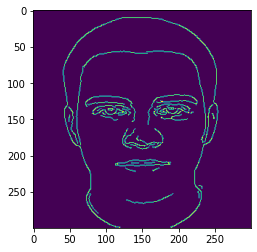

In [11]:
plt.imshow(gaus_canny('./download.jpg'))

Enter the file for the person which is to be authenticated: ./test3.jpg
./Data/2.jpg
./Data/3.jpg
./Data/4.jpg
./Data/5.2.jpg
./Data/6.2.jpg
./Data/Anu.jpg
./Data/Arnav.jpg
./Data/Arnav2.jpg
./Data/Arshi.jpg
./Data/H1.jpg


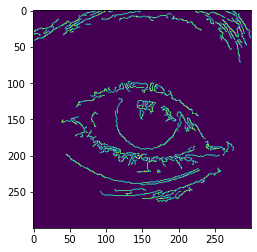

In [78]:
img_list = sorted(os.listdir('./Data'))
person_to_be_checked = input('Enter the file for the person which is to be authenticated: ')
sift = cv2.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(get_eye_img(person_to_be_checked), None)



index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

good_points_list = []

for i in img_list:
    pathimg = './Data/'+i
    print(pathimg)
    img = gaus_canny(pathimg)
    kp_new, desc_new = sift.detectAndCompute(img, None)
    matches = flann.knnMatch(desc_1,desc_new,k=2)
    good_points= []
    for m, n in matches:
        if m.distance < 0.6*n.distance:
            good_points.append(m)
    good_points_list.append(good_points)
    


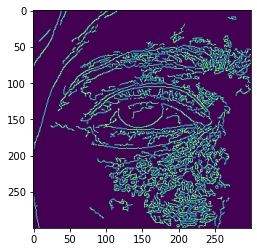

In [79]:
plt.imshow(gaus_canny('./Data/6.2.jpg'))

In [80]:
stored_only_points = []
for i in good_points_list:
    stored_only_points.append(len(i))
    print(len(i))
print((img_list[np.argmax(stored_only_points)])[:-4])    


0
0
0
0
1
0
0
1
2
0
Arshi
